## Imports

In [2]:
import sys
import os
import pickle

library_path = os.path.join('..', '..', '..','UCB-USACE-LSTMs')
sys.path.insert(0, library_path)

from pathlib import Path
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt
import torch
from neuralhydrology.evaluation.metrics import *
from neuralhydrology.nh_run import start_run, eval_run, finetune
from neuralhydrology.utils.nh_results_ensemble import create_results_ensemble
from neuralhydrology.UCB_training.UCB_train import UCB_trainer
from neuralhydrology.UCB_training.UCB_train import clean_hourly
from neuralhydrology.UCB_training.UCB_train import combinedPlot
from neuralhydrology.evaluation.metrics import calculate_all_metrics

## Working directory

In [4]:
print("Current Working Directory:", os.getcwd())
print("Train Basin File Exists:", os.path.exists("calpella"))

Current Working Directory: F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all
Train Basin File Exists: True


## Standard hourly LSTM, train on training subset, evaluate on evaluation period (for hyperparameter search)

In [6]:
path_to_csv = Path("F:/Dino/UCB-USACE-LSTMs/data/updated_russian_river_folder/")
path_to_yaml = Path("calpella_gage.yaml")
params = {
    "epochs":8,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}
#defaults to daily so need to specify hourly
lstmNoPhysicsHourly = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, hourly=True)

In [7]:
lstmNoPhysicsHourly.train()

2025-01-29 08:26:01,594: Logging to F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\runs\testing_run_2901_082601\output.log initialized.
2025-01-29 08:26:01,596: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\runs\testing_run_2901_082601
2025-01-29 08:26:01,599: ### Run configurations for testing_run
2025-01-29 08:26:01,601: experiment_name: testing_run
2025-01-29 08:26:01,602: train_basin_file: calpella
2025-01-29 08:26:01,604: validation_basin_file: calpella
2025-01-29 08:26:01,605: test_basin_file: calpella
2025-01-29 08:26:01,607: train_start_date: 1994-10-01 00:00:00
2025-01-29 08:26:01,608: train_end_date: 2002-09-30 00:00:00
2025-01-29 08:26:01,610: validation_start_date: 2002-10-01 00:00:00
2025-01-29 08:26:01,612: validation_end_date: 2005-09-30 00:00:00
2025-01-29 08:26:01,613: test_start_date: 2005-10-01 00:00:00
2025-01-29 08:26:01,615: test_end_date: 2009-09-30 00:00:00
2025-01-29 08:26:01,616: device: cpu
2025-01-29 08:26:01,618:

F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.mo

# Validation: 100%|██████████| 1/1 [00:05<00:00,  5.30s/it]
2025-01-29 08:29:46,074: Stored metrics at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\runs\testing_run_2901_082601\validation\model_epoch008\validation_metrics.csv
2025-01-29 08:29:46,080: Stored results at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\runs\testing_run_2901_082601\validation\model_epoch008\validation_results.p


WindowsPath('F:/Dino/UCB-USACE-LSTMs/neuralhydrology/calpella_all/runs/testing_run_2901_082601')

Using basin: Calpella
Using target variable: NR CALPELLA FLOW COE CPL
Observed_key: NR CALPELLA FLOW COE CPL_obs
Simulated_key: NR CALPELLA FLOW COE CPL_sim


F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' ins

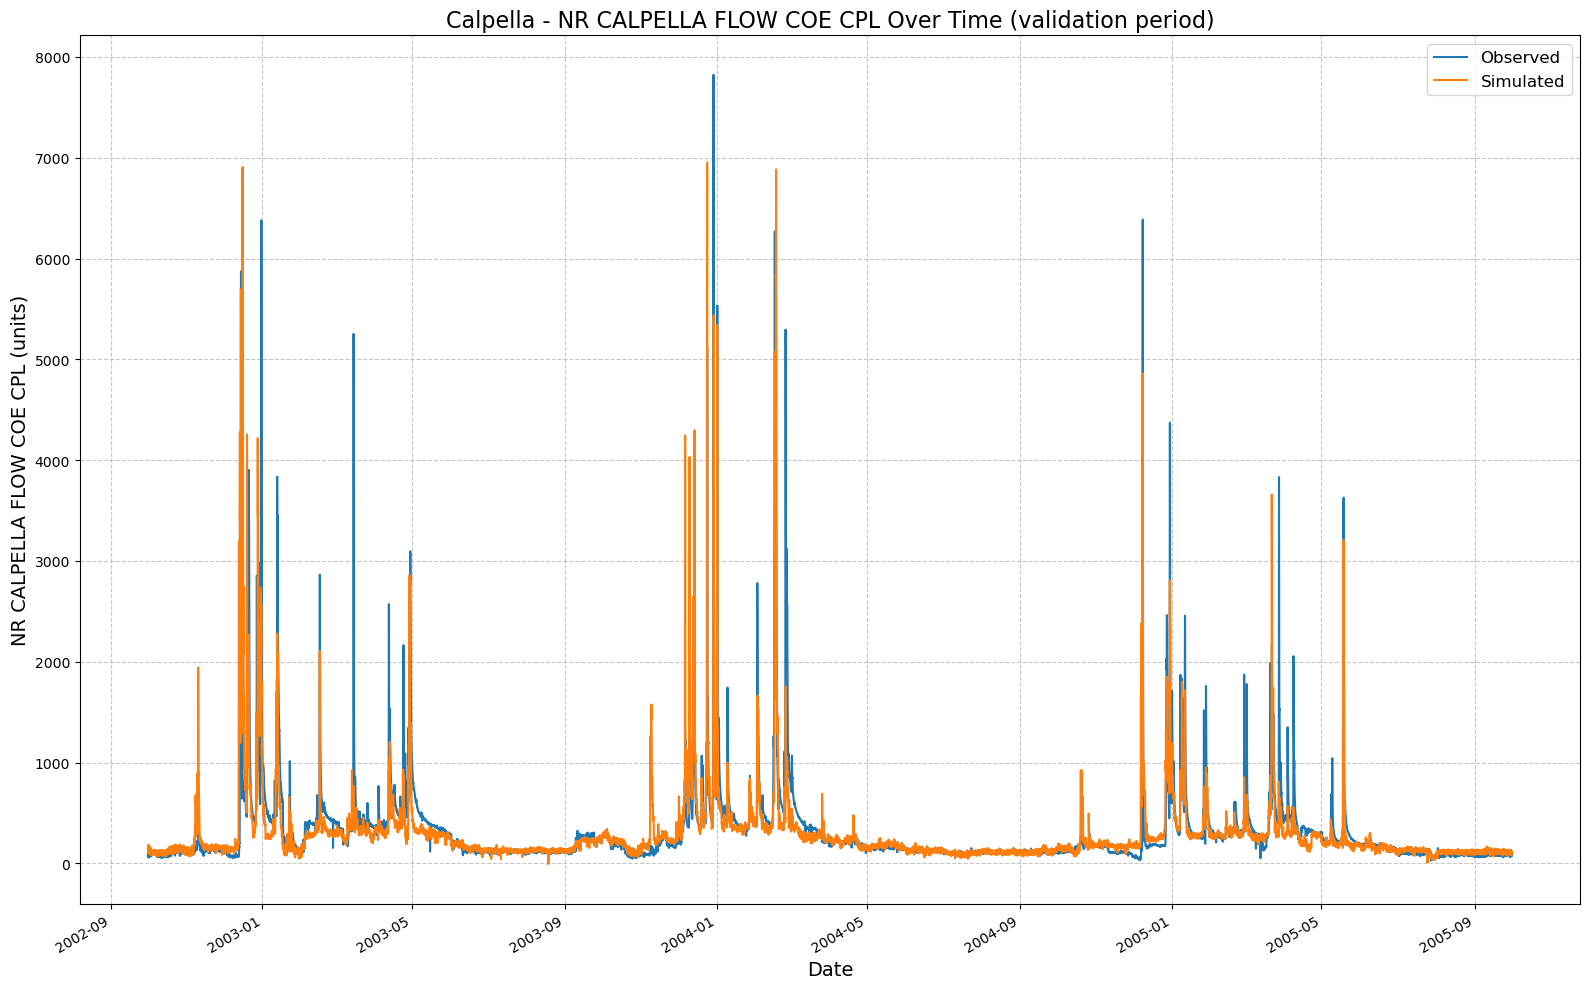

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\runs\testing_run_2901_082601\results_output_validation.csv


({'NSE': 0.6635604202747345,
  'MSE': 73487.5390625,
  'RMSE': 271.0858518301905,
  'KGE': 0.7447401966922291,
  'Alpha-NSE': 0.8387715771732058,
  'Beta-KGE': 0.9260561466217041,
  'Beta-NSE': -0.0501029608156001,
  'Pearson-r': 0.8164372875416268,
  'FHV': -15.22262841463089,
  'FMS': -29.81832577593395,
  'FLV': -1397.4978508356132,
  'Peak-Timing': nan,
  'Peak-MAPE': 53.77539396286011},
 WindowsPath('F:/Dino/UCB-USACE-LSTMs/neuralhydrology/calpella_all/runs/testing_run_2901_082601/results_output_validation.csv'))

In [8]:
lstmNoPhysicsHourly.results()

## Physics-informed LSTM, train on training subset, evaluate on evaluation period (for hyperparameter search)

In [10]:
path_to_csv = Path("F:/Dino/UCB-USACE-LSTMs/data/updated_russian_river_folder/")
path_to_yaml = Path("calpella_gage.yaml")
path_to_physics_data = Path("F:/Dino/UCB-USACE-LSTMs/data/updated_russian_river_folder/Calpella_hourly.csv")
params = {
    "epochs":8,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}
features_with_physics = [
    #from hourly
    "EF RUSSIAN 20 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "EF RUSSIAN 20 PRECIP-INC SCREENED",
    "POTTER VALLEY CA FLOW USGS_ADJUSTED",
    "UKIAH CA HUMIDITY USAF-NOAA",
    "UKIAH CA SOLAR RADIATION USAF-NOAA",
    "UKIAH CA TEMPERATURE USAF-NOAA",
    "UKIAH CA WINDSPEED USAF-NOAA",
    #from new capella.csv
    'Capella Gage FLOW',
    'EF Russian 20 ET-POTENTIAL',
    'EF Russian 20 FLOW',
    'EF Russian 20 FLOW-BASE',
    'EF Russian 20 INFILTRATION',
    'EF Russian 20 PERC-SOIL',
    'EF Russian 20 SATURATION FRACTION',
#    'Lake Mendocino Storage',
    ]
lstmPhysicsHourly = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, input_features= features_with_physics, physics_informed=True, physics_data_file=path_to_physics_data, hourly=True)

In [11]:
lstmPhysicsHourly.train()

2025-01-29 08:29:47,345: Logging to F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\runs\testing_run_2901_082947\output.log initialized.
2025-01-29 08:29:47,349: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\runs\testing_run_2901_082947
2025-01-29 08:29:47,351: ### Run configurations for testing_run
2025-01-29 08:29:47,353: experiment_name: testing_run
2025-01-29 08:29:47,355: train_basin_file: calpella
2025-01-29 08:29:47,356: validation_basin_file: calpella
2025-01-29 08:29:47,356: test_basin_file: calpella
2025-01-29 08:29:47,357: train_start_date: 1994-10-01 00:00:00
2025-01-29 08:29:47,358: train_end_date: 2002-09-30 00:00:00
2025-01-29 08:29:47,360: validation_start_date: 2002-10-01 00:00:00
2025-01-29 08:29:47,361: validation_end_date: 2005-09-30 00:00:00
2025-01-29 08:29:47,363: test_start_date: 2005-10-01 00:00:00
2025-01-29 08:29:47,364: test_end_date: 2009-09-30 00:00:00
2025-01-29 08:29:47,365: device: cpu
2025-01-29 08:29:47,366:

F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.mo

# Validation: 100%|██████████| 1/1 [00:06<00:00,  6.73s/it]
2025-01-29 08:33:38,344: Stored metrics at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\runs\testing_run_2901_082947\validation\model_epoch008\validation_metrics.csv
2025-01-29 08:33:38,351: Stored results at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\runs\testing_run_2901_082947\validation\model_epoch008\validation_results.p


WindowsPath('F:/Dino/UCB-USACE-LSTMs/neuralhydrology/calpella_all/runs/testing_run_2901_082947')

Using basin: Calpella
Using target variable: NR CALPELLA FLOW COE CPL
Observed_key: NR CALPELLA FLOW COE CPL_obs
Simulated_key: NR CALPELLA FLOW COE CPL_sim


F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' ins

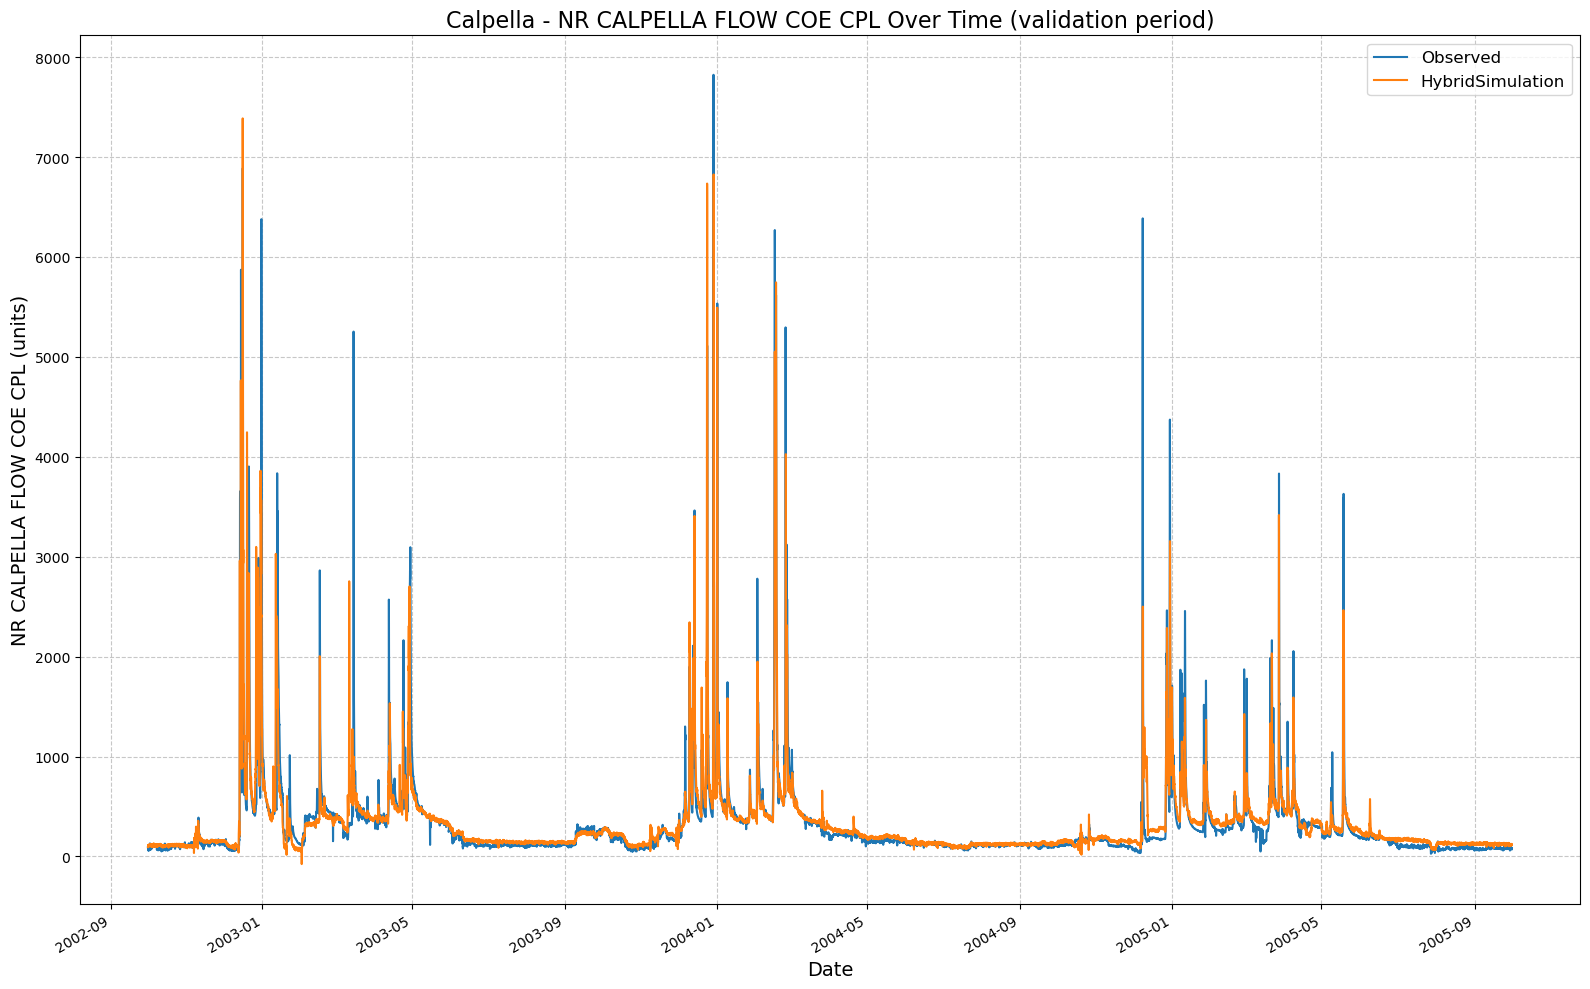

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\runs\testing_run_2901_082947\results_output_validation.csv


({'NSE': 0.7434139251708984,
  'MSE': 56045.36328125,
  'RMSE': 236.73901934672705,
  'KGE': 0.8212317595028038,
  'Alpha-NSE': 0.8914653397902806,
  'Beta-KGE': 1.0377658605575562,
  'Beta-NSE': 0.025589432386060745,
  'Pearson-r': 0.8630618711973492,
  'FHV': -10.43933853507042,
  'FMS': -16.939767422626765,
  'FLV': -1401.5652236507585,
  'Peak-Timing': nan,
  'Peak-MAPE': 42.16465353965759},
 WindowsPath('F:/Dino/UCB-USACE-LSTMs/neuralhydrology/calpella_all/runs/testing_run_2901_082947/results_output_validation.csv'))

In [12]:
lstmPhysicsHourly.results()

## Retrain LSTM on entire train period using best hyperparameters, evaluate on test period

In [20]:
path_to_csv = Path("F:/Dino/UCB-USACE-LSTMs/data/updated_russian_river_folder/")
path_to_yaml = Path("calpella_gage.yaml")
params = {
    "epochs":16,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}
#defaults to daily so no need to specify hourly
lstmNoPhysicsHourlyExtended = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, hourly=True, extend_train_period=True)

In [22]:
lstmNoPhysicsHourlyExtended.train()

2025-01-29 08:40:22,376: Logging to F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\runs\testing_run_2901_084022\output.log initialized.
2025-01-29 08:40:22,379: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\runs\testing_run_2901_084022
2025-01-29 08:40:22,381: ### Run configurations for testing_run
2025-01-29 08:40:22,383: experiment_name: testing_run
2025-01-29 08:40:22,385: train_basin_file: calpella
2025-01-29 08:40:22,389: validation_basin_file: calpella
2025-01-29 08:40:22,392: test_basin_file: calpella
2025-01-29 08:40:22,394: train_start_date: 1994-10-01 00:00:00
2025-01-29 08:40:22,396: train_end_date: 2005-09-30 00:00:00
2025-01-29 08:40:22,397: validation_start_date: 2002-10-01 00:00:00
2025-01-29 08:40:22,399: validation_end_date: 2005-09-30 00:00:00
2025-01-29 08:40:22,400: test_start_date: 2005-10-01 00:00:00
2025-01-29 08:40:22,402: test_end_date: 2009-09-30 00:00:00
2025-01-29 08:40:22,404: device: cpu
2025-01-29 08:40:22,406:

F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.mo

# Validation: 100%|██████████| 1/1 [00:05<00:00,  5.28s/it]
2025-01-29 08:50:45,873: Stored metrics at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\runs\testing_run_2901_084022\validation\model_epoch016\validation_metrics.csv
2025-01-29 08:50:45,882: Stored results at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\runs\testing_run_2901_084022\validation\model_epoch016\validation_results.p


WindowsPath('F:/Dino/UCB-USACE-LSTMs/neuralhydrology/calpella_all/runs/testing_run_2901_084022')

2025-01-29 08:50:45,957: Using the model weights from F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\runs\testing_run_2901_084022\model_epoch016.pt


F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.mo

# Evaluation: 100%|██████████| 1/1 [00:06<00:00,  6.67s/it]
2025-01-29 08:50:52,637: Stored metrics at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\runs\testing_run_2901_084022\test\model_epoch016\test_metrics.csv
2025-01-29 08:50:52,645: Stored results at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\runs\testing_run_2901_084022\test\model_epoch016\test_results.p
Using basin: Calpella
Using target variable: NR CALPELLA FLOW COE CPL
Observed_key: NR CALPELLA FLOW COE CPL_obs
Simulated_key: NR CALPELLA FLOW COE CPL_sim


F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' ins

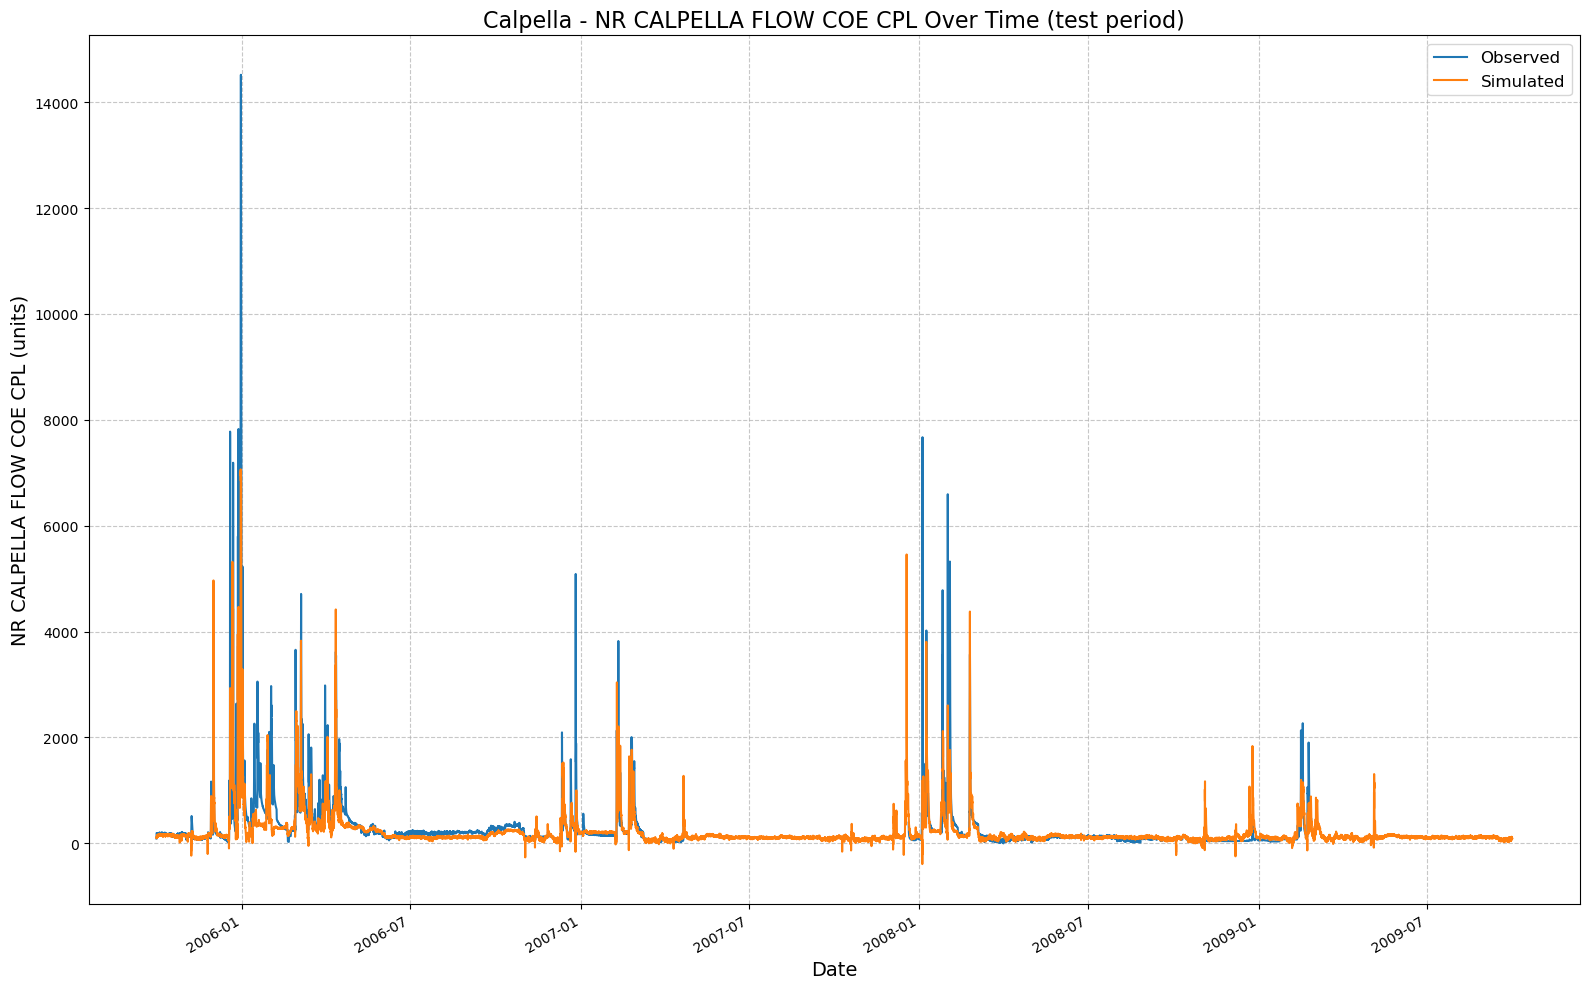

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\runs\testing_run_2901_084022\results_output_test.csv


In [23]:
lstm_result_metrics, lstm_result_path = lstmNoPhysicsHourlyExtended.results('test')

In [24]:
lstm_result_metrics

{'NSE': 0.6447867453098297,
 'MSE': 127337.828125,
 'RMSE': 356.8442631246858,
 'KGE': 0.5791854265577452,
 'Alpha-NSE': 0.6588759418114484,
 'Beta-KGE': 0.8271891474723816,
 'Beta-NSE': -0.08584632569037459,
 'Pearson-r': 0.8243421183236054,
 'FHV': -31.550073623657227,
 'FMS': -28.93794031530327,
 'FLV': -0.9343004624248419,
 'Peak-Timing': nan,
 'Peak-MAPE': 60.97074747085571}

## Retrain PI-LSTM on entire train period using best hyperparameters, evaluate on test period

In [26]:
path_to_csv = Path("F:/Dino/UCB-USACE-LSTMs/data/updated_russian_river_folder/")
path_to_yaml = Path("calpella_gage.yaml")
path_to_physics_data = Path("F:/Dino/UCB-USACE-LSTMs/data/updated_russian_river_folder/Calpella_hourly.csv")
params = {
    "epochs":16,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}
features_with_physics = [
    #from hourly
    "EF RUSSIAN 20 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "EF RUSSIAN 20 PRECIP-INC SCREENED",
    "POTTER VALLEY CA FLOW USGS_ADJUSTED",
    "UKIAH CA HUMIDITY USAF-NOAA",
    "UKIAH CA SOLAR RADIATION USAF-NOAA",
    "UKIAH CA TEMPERATURE USAF-NOAA",
    "UKIAH CA WINDSPEED USAF-NOAA",
    #from new capella.csv
    'Capella Gage FLOW',
    'EF Russian 20 ET-POTENTIAL',
    'EF Russian 20 FLOW',
    'EF Russian 20 FLOW-BASE',
    'EF Russian 20 INFILTRATION',
    'EF Russian 20 PERC-SOIL',
    'EF Russian 20 SATURATION FRACTION',
#    'Lake Mendocino Storage',
    ]
#extend train period set to true
lstmPhysicsHourlyExtended = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, input_features= features_with_physics, physics_informed=True, physics_data_file=path_to_physics_data, hourly=True, extend_train_period=True)

In [27]:
lstmPhysicsHourlyExtended.train()

2025-01-29 08:50:53,818: Logging to F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\runs\testing_run_2901_085053\output.log initialized.
2025-01-29 08:50:53,820: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\runs\testing_run_2901_085053
2025-01-29 08:50:53,822: ### Run configurations for testing_run
2025-01-29 08:50:53,824: experiment_name: testing_run
2025-01-29 08:50:53,827: train_basin_file: calpella
2025-01-29 08:50:53,829: validation_basin_file: calpella
2025-01-29 08:50:53,831: test_basin_file: calpella
2025-01-29 08:50:53,833: train_start_date: 1994-10-01 00:00:00
2025-01-29 08:50:53,834: train_end_date: 2005-09-30 00:00:00
2025-01-29 08:50:53,836: validation_start_date: 2002-10-01 00:00:00
2025-01-29 08:50:53,838: validation_end_date: 2005-09-30 00:00:00
2025-01-29 08:50:53,839: test_start_date: 2005-10-01 00:00:00
2025-01-29 08:50:53,840: test_end_date: 2009-09-30 00:00:00
2025-01-29 08:50:53,842: device: cpu
2025-01-29 08:50:53,843:

F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.mo

# Validation: 100%|██████████| 1/1 [00:06<00:00,  6.53s/it]
2025-01-29 09:01:26,937: Stored metrics at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\runs\testing_run_2901_085053\validation\model_epoch016\validation_metrics.csv
2025-01-29 09:01:26,947: Stored results at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\runs\testing_run_2901_085053\validation\model_epoch016\validation_results.p


WindowsPath('F:/Dino/UCB-USACE-LSTMs/neuralhydrology/calpella_all/runs/testing_run_2901_085053')

2025-01-29 09:01:27,029: Using the model weights from F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\runs\testing_run_2901_085053\model_epoch016.pt


F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.mo

# Evaluation: 100%|██████████| 1/1 [00:07<00:00,  7.25s/it]
2025-01-29 09:01:34,291: Stored metrics at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\runs\testing_run_2901_085053\test\model_epoch016\test_metrics.csv
2025-01-29 09:01:34,303: Stored results at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\runs\testing_run_2901_085053\test\model_epoch016\test_results.p
Using basin: Calpella
Using target variable: NR CALPELLA FLOW COE CPL
Observed_key: NR CALPELLA FLOW COE CPL_obs
Simulated_key: NR CALPELLA FLOW COE CPL_sim


F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' ins

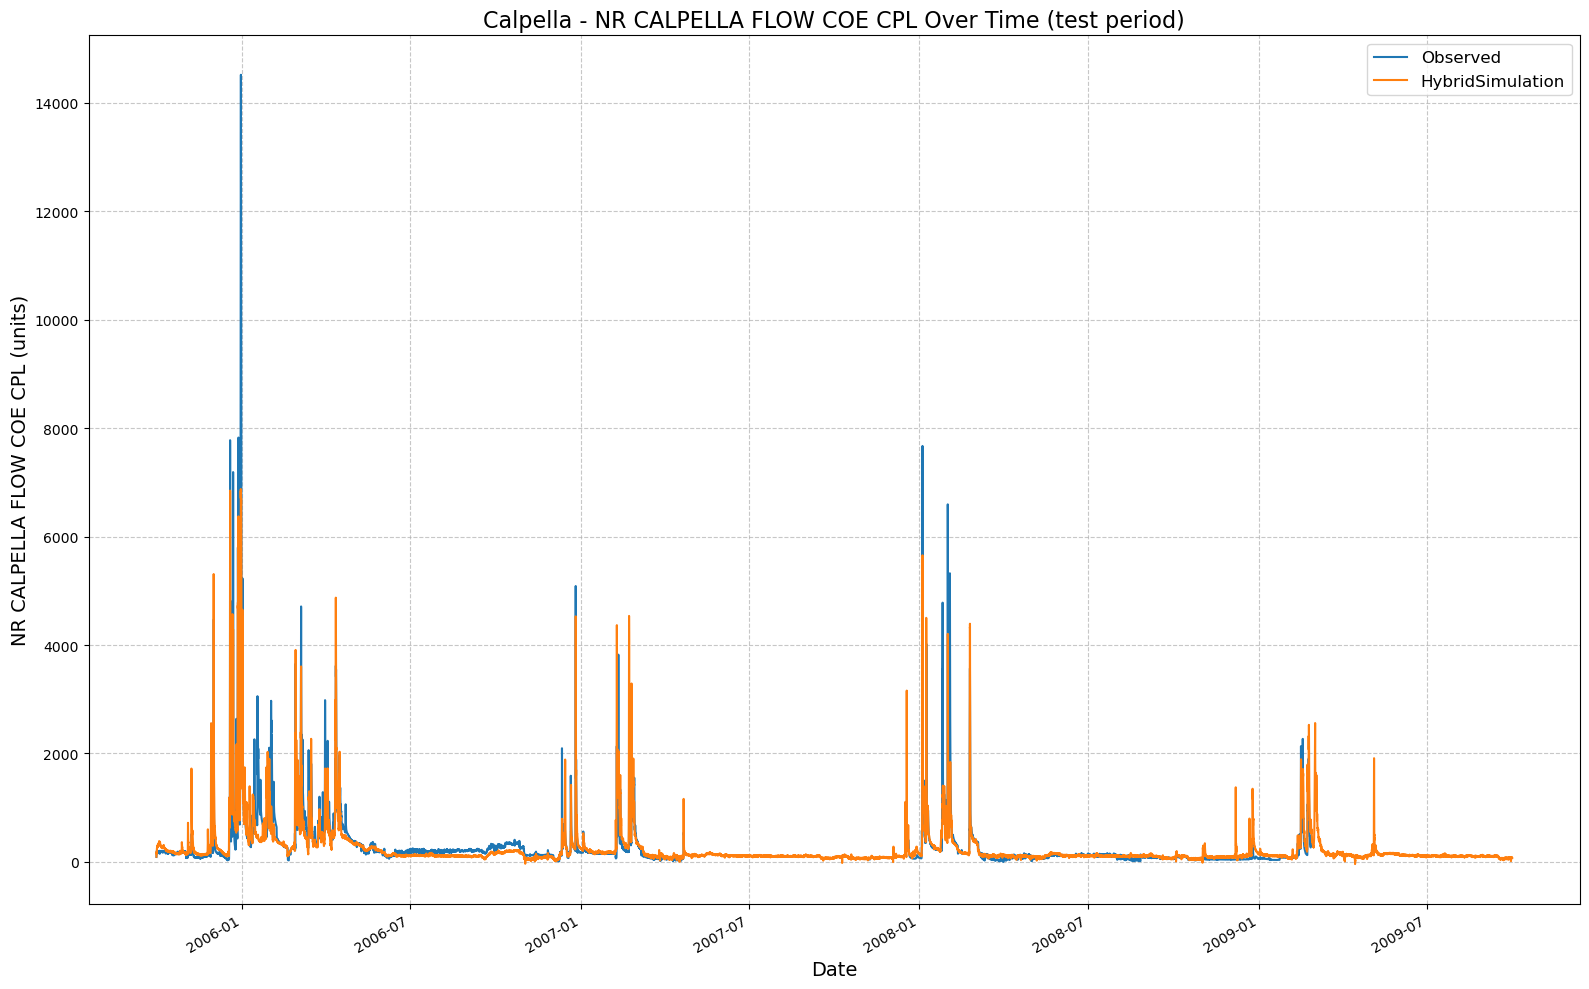

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\runs\testing_run_2901_085053\results_output_test.csv


In [28]:
physics_informed_result_metrics, physics_informed_result_path = lstmPhysicsHourlyExtended.results('test')

In [29]:
physics_informed_result_metrics

{'NSE': 0.7644694894552231,
 'MSE': 84433.6328125,
 'RMSE': 290.5746596186598,
 'KGE': 0.7838020598044428,
 'Alpha-NSE': 0.8243770452914602,
 'Beta-KGE': 0.9775317907333374,
 'Beta-NSE': -0.01116141309461588,
 'Pearson-r': 0.8759302345589655,
 'FHV': -12.574662268161774,
 'FMS': -15.091943958155266,
 'FLV': -2.4718592455396546,
 'Peak-Timing': nan,
 'Peak-MAPE': 37.96799580256145}

## Inspect results

In [31]:
    model1_df = pd.read_csv(lstm_result_path) #colums: Date, Observed, Predicted
    model1_df.head()

,Date,Observed,Predicted
0,2005-10-01 00:00:00,92.0,101.14418
1,2005-10-01 01:00:00,95.0,98.00865
2,2005-10-01 02:00:00,192.0,116.15016
3,2005-10-01 03:00:00,193.0,108.27817
4,2005-10-01 04:00:00,194.0,107.41678


In [32]:
    model2_df = pd.read_csv(physics_informed_result_path) #colums: Date, Observed, Predicted
    model1_df.head()

,Date,Observed,Predicted
0,2005-10-01 00:00:00,92.0,101.14418
1,2005-10-01 01:00:00,95.0,98.00865
2,2005-10-01 02:00:00,192.0,116.15016
3,2005-10-01 03:00:00,193.0,108.27817
4,2005-10-01 04:00:00,194.0,107.41678


In [33]:
    hms_df = clean_hourly(pd.read_csv(path_to_physics_data))
    hms_df.head()

C:\Users\Dino\AppData\Local\Temp\ipykernel_31340\3665493559.py:1: DtypeWarning: Columns (0,3,4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  hms_df = clean_hourly(pd.read_csv(path_to_physics_data))


,Day,Time,Capella Gage FLOW,EF Russian 20 ET-POTENTIAL,EF Russian 20 FLOW,EF Russian 20 FLOW-BASE,EF Russian 20 INFILTRATION,EF Russian 20 PERC-SOIL,EF Russian 20 SATURATION FRACTION
date,,,,,,,,,
1994-10-01 01:00:00,1-Oct-94,01:00:00,586.723761,0,489.723761,489.723761,0,0,0.7
1994-10-01 02:00:00,1-Oct-94,02:00:00,572.217931,0,475.217931,475.217931,0,0,0.7
1994-10-01 03:00:00,1-Oct-94,03:00:00,558.904771,0,461.904771,461.904771,0,0,0.7
1994-10-01 04:00:00,1-Oct-94,04:00:00,546.701684,0,449.701684,449.701684,0,0,0.7
1994-10-01 05:00:00,1-Oct-94,05:00:00,535.521337,0,438.521337,438.521337,0,0,0.7


 ## Plot combined results

F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\UCB_training\UCB_train.py:452: DtypeWarning: Columns (0,3,4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  hms_df = clean_daily(pd.read_csv(HMS_results))


            date  Observed_Model1  Predicted_Model1  Observed_Model2  \
96432 2005-10-01             92.0         101.14418             92.0   
96433 2005-10-01             92.0         101.14418             92.0   
96434 2005-10-01             92.0         101.14418             92.0   
96435 2005-10-01             92.0         101.14418             92.0   
96436 2005-10-01             92.0         101.14418             92.0   

       Predicted_Model2  HMS_predicted  
96432         95.161804     619.723761  
96433         95.161804     605.217931  
96434         95.161804     591.904771  
96435         95.161804     579.701684  
96436         95.161804     568.521337  


F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' ins

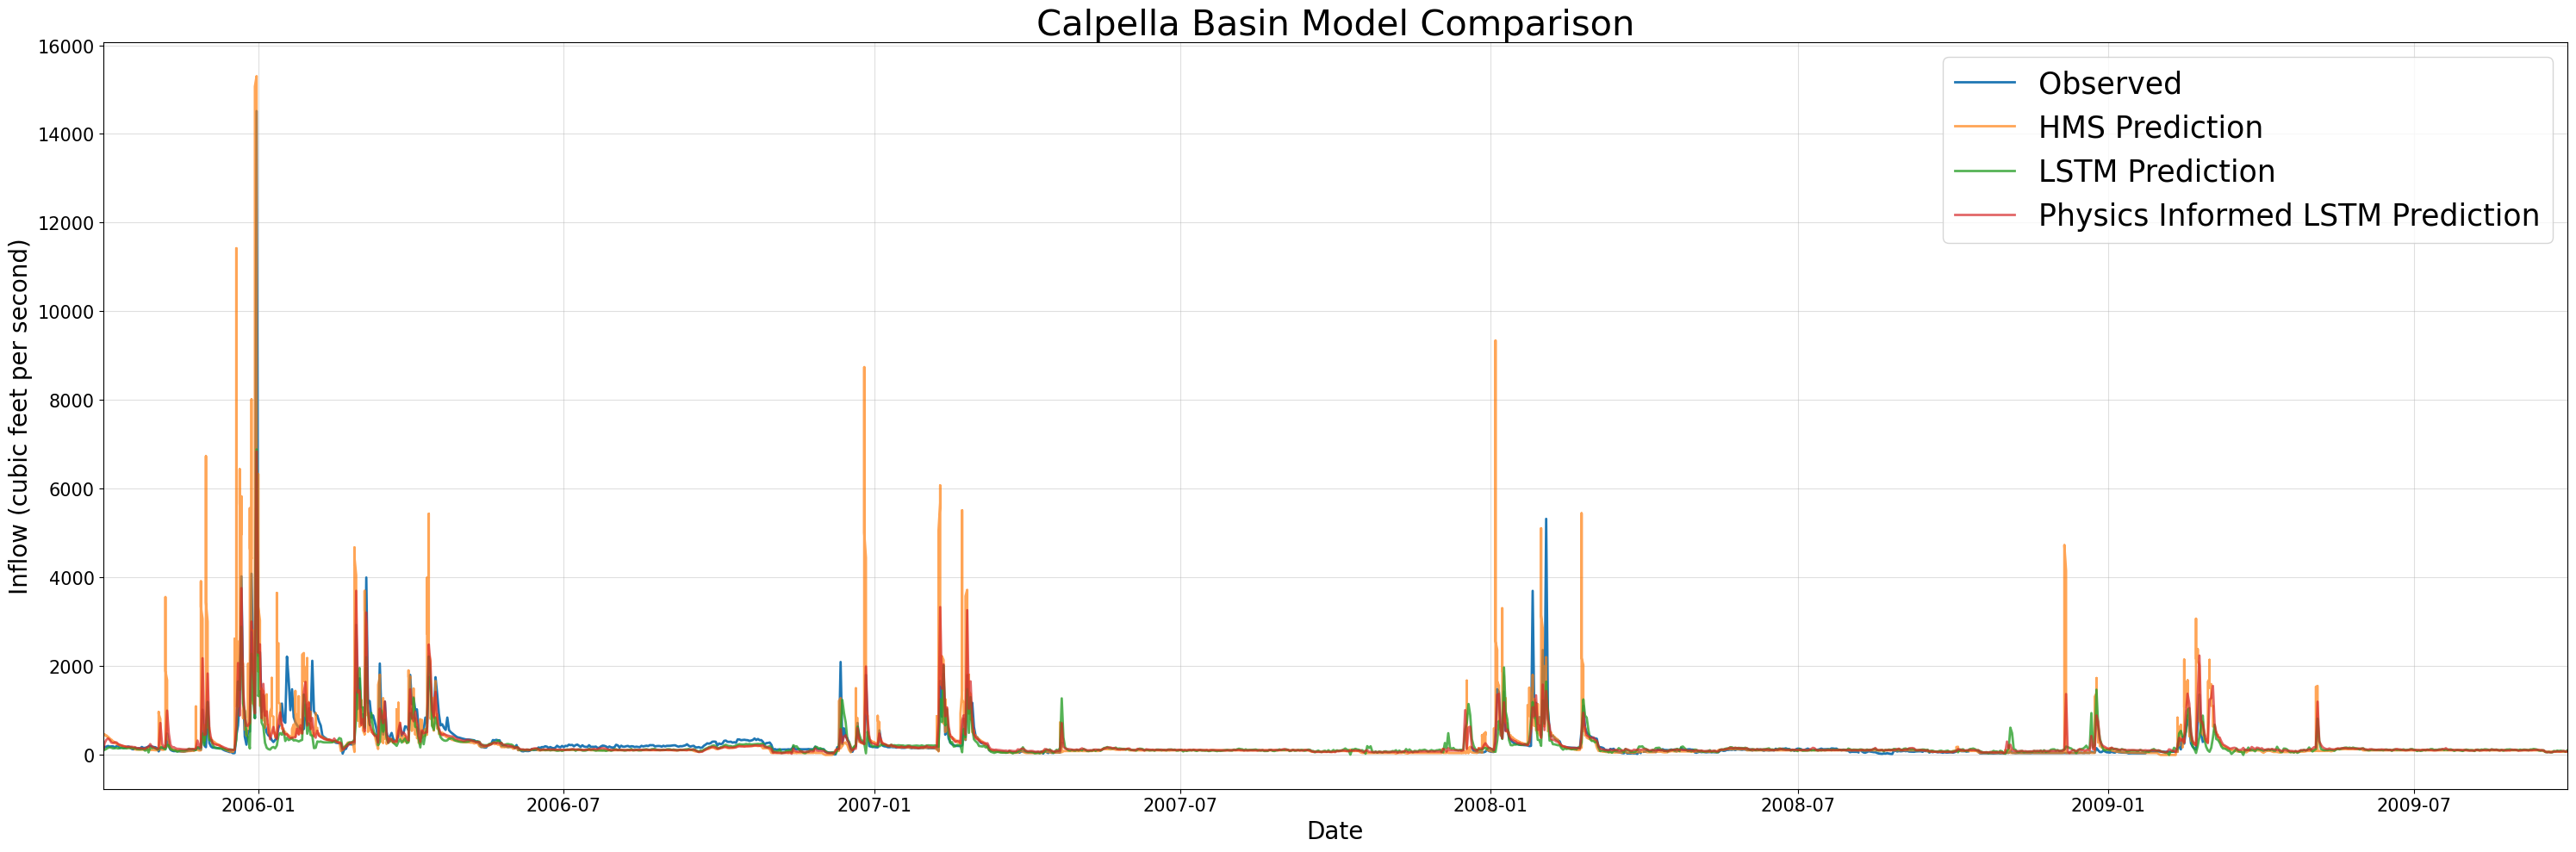

In [35]:
myplot, metrics_df = combinedPlot(lstm_results=lstm_result_path, lstmPhysics_results= physics_informed_result_path, HMS_results=path_to_physics_data, title='Calpella Basin Model Comparison', fName = "calpella_hourly_metrics.csv")

In [36]:
metrics_df

,HMS,LSTM,Physics_Informed_LSTM
NSE,0.036254,0.646482,0.692521
MSE,388850.847668,142637.038878,124061.279624
RMSE,623.579063,377.673191,352.223338
KGE,0.556051,0.516772,0.675991
Alpha-NSE,1.129171,0.572708,0.718530
Beta-KGE,1.070261,0.825848,0.976441
Beta-NSE,0.032611,-0.080831,-0.010935
Pearson-r,0.581110,0.856466,0.841249
FHV,27.945346,-37.736687,-16.745766
FMS,1.136542,-27.243624,-14.059727
